In [1]:
import sys
import os

SCRIPT_PATH = os.path.join(os.path.abspath(os.path.dirname('../__file__')), 'script')
sys.path.insert(0, SCRIPT_PATH)

from markov_device import *
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

ACT-R connection has been started.


# Stay Probability

Compare the stay probabilityt of Model-free vs. Model-based across mmultiple simulations

In [2]:
def simulate_stay_probability(model="markov-model1", epoch=1, n=20, task_params=None, actr_params=None):
    
    rewards = 0.0
    df_state1stay = []
    for i in tqdm(range(epoch)):
        m = MarkovACTR(setup=False) 
        m.setup(model, verbose=False, 
                task_params=task_params,
                actr_params=actr_params)
        if (i==0): print(m)
        m.run_experiment(n)
        df = m.calculate_stay_probability()
        df_state1stay.append(df.groupby(['received_reward', 'reward_frequency', 'state_frequency']).agg({'state1_stay': lambda x: x.mean(skipna=True)}).reset_index())

        # plot 
        rewards += df['received_reward'].sum()
        
        
    print('--- simulation ---', epoch)
    print('mean reward =', str(rewards/epoch))
    dff = pd.concat(df_state1stay, axis=0)
    ax = sns.pointplot(data=dff, x='received_reward', y='state1_stay',
                       hue='state_frequency',
                       order = sorted(df['received_reward'].unique(), reverse=True), 
                       join=True, dodge=True) 
    ax.set(ylim=(0, 1.1))
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', label_type='center', color='white')
    
    if model=="markov-model1": plt.title('markov-model-free') 
    else: plt.title('markov-model-base')
    plt.show()
    
    return dff

  0%|          | 0/10 [00:00<?, ?it/s]

######### SETUP MODEL markov-model1 #########
 	>> TASK PARAMETERS: {'MARKOV_PROBABILITY': 0.7, 'REWARD_PROBABILITY': 0.7, 'REWARD': {'B1': 2, 'B2': 0, 'C1': 0, 'C2': 0}} <<
 	>> ACT-R PARAMETERS: {'v': None, 'seed': [100, 0], 'ans': 0.1, 'le': 1.0, 'mas': None, 'egs': 0.1, 'alpha': 0.2, 'imaginal-activation': 1.0} <<



100%|██████████| 10/10 [02:59<00:00, 17.90s/it]


--- simulation --- 10
mean reward = 132.4


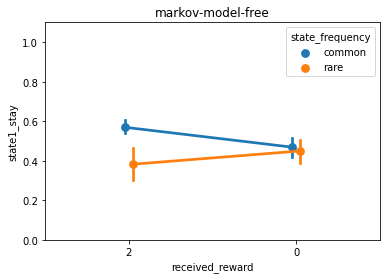

In [3]:
sim1 = simulate_stay_probability(model="markov-model1", epoch=10, n=200)

  0%|          | 0/10 [00:00<?, ?it/s]

######### SETUP MODEL markov-model2 #########
 	>> TASK PARAMETERS: {'MARKOV_PROBABILITY': 0.7, 'REWARD_PROBABILITY': 0.7, 'REWARD': {'B1': 2, 'B2': 0, 'C1': 0, 'C2': 0}} <<
 	>> ACT-R PARAMETERS: {'v': None, 'seed': [100, 0], 'ans': 0.1, 'le': 1.0, 'mas': None, 'egs': 0.1, 'alpha': 0.2, 'imaginal-activation': 1.0} <<



100%|██████████| 10/10 [03:11<00:00, 19.19s/it]


--- simulation --- 10
mean reward = 137.6


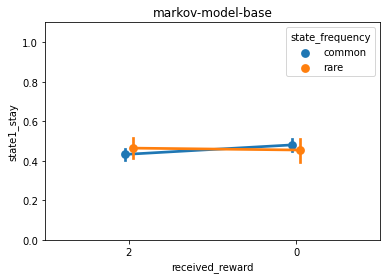

In [4]:
sim2 = simulate_stay_probability(model="markov-model2", epoch=10, n=200)

## Updates Parameters

In [7]:
task_params={'REWARD_PROBABILITY':.9, 'REWARD':{'B1': 2, 'B2': 0, 'C1': 0, 'C2': 2}}
actr_params=None#{'ans':.5, 'mas':.5, 'egs':.5}

  0%|          | 0/10 [00:00<?, ?it/s]

######### SETUP MODEL markov-model1 #########
 	>> TASK PARAMETERS: {'MARKOV_PROBABILITY': 0.7, 'REWARD_PROBABILITY': 0.9, 'REWARD': {'B1': 2, 'B2': 0, 'C1': 0, 'C2': 2}} <<
 	>> ACT-R PARAMETERS: {'v': None, 'seed': [100, 0], 'ans': 0.1, 'le': 1.0, 'mas': None, 'egs': 0.1, 'alpha': 0.2, 'imaginal-activation': 1.0} <<



100%|██████████| 10/10 [03:11<00:00, 19.13s/it]


--- simulation --- 10
mean reward = 192.8


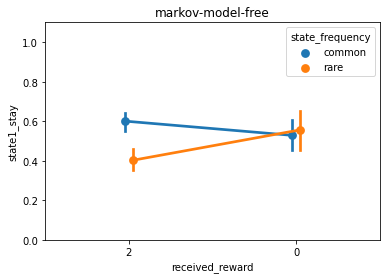

In [8]:
sim3 = simulate_stay_probability(model="markov-model1", epoch=10, n=200, actr_params=actr_params, task_params=task_params)

  0%|          | 0/10 [00:00<?, ?it/s]

######### SETUP MODEL markov-model2 #########
 	>> TASK PARAMETERS: {'MARKOV_PROBABILITY': 0.7, 'REWARD_PROBABILITY': 0.9, 'REWARD': {'B1': 2, 'B2': 0, 'C1': 0, 'C2': 2}} <<
 	>> ACT-R PARAMETERS: {'v': None, 'seed': [100, 0], 'ans': 0.1, 'le': 1.0, 'mas': None, 'egs': 0.1, 'alpha': 0.2, 'imaginal-activation': 1.0} <<



100%|██████████| 10/10 [03:30<00:00, 21.06s/it]


--- simulation --- 10
mean reward = 356.8


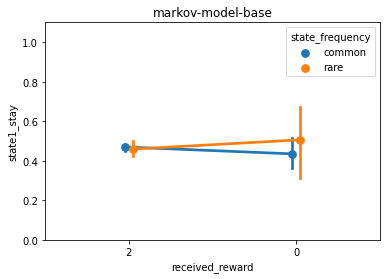

#|Warning: Changing declarative parameters with chunks in dm not supported. |#
#|Warning: Results may not be what one expects. |#
Declarative parameters for chunk M1-1:
 :ACTIVATION -0.047
Declarative parameters for chunk M1-2:
 :ACTIVATION  0.740
Declarative parameters for chunk M1-3:
 :ACTIVATION -0.125
Declarative parameters for chunk M1-4:
 :ACTIVATION  1.054
Declarative parameters for chunk M2-1:
 :ACTIVATION  2.571
Declarative parameters for chunk M2-2:
 :ACTIVATION  0.634
Declarative parameters for chunk M2-3:
 :ACTIVATION  0.406
Declarative parameters for chunk M2-4:
 :ACTIVATION -1.912
#|Warning: M3-1 does not name a chunk in DM. |#
#|Warning: M3-2 does not name a chunk in DM. |#
#|Warning: M3-3 does not name a chunk in DM. |#
#|Warning: M3-4 does not name a chunk in DM. |#
#|Warning: M4-1 does not name a chunk in DM. |#
#|Warning: M4-2 does not name a chunk in DM. |#
#|Warning: M4-3 does not name a chunk in DM. |#
#|Warning: M4-4 does not name a chunk in DM. |#
Declarative pa

In [9]:
sim4 = simulate_stay_probability(model="markov-model2", epoch=10, n=200, actr_params=actr_params, task_params=task_params)